In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
%matplotlib inline

In [12]:
# Reading the image
image = cv2.imread("ironman.jpg")

## Printing out the dimentions of the image
print(image.shape)

(260, 478, 3)


The image is 260x478 pixels and has 3 color channels . R,G,B

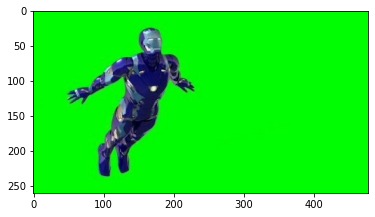

In [13]:
plt.imshow(image)

The colors are reversed since, open cv reads the images in BGR format and not RGB. So we will first need to convert it 

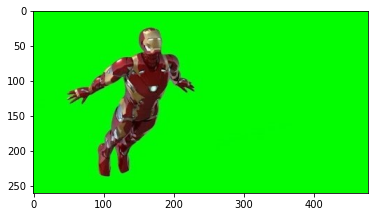

In [14]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

Now, we'll be making the thresholds, as to from what to what range we want to select the color. Since we want to select only the green color, so we'll set the lower and upper thresholds. This is a hit and trial method mainly

In [0]:
lower_bound = np.array([0,100,0]) ## The values are for R,G,B. So the lower bound is when we'll have no R and B
## And we can have a minimum of 230 G value, for it to be selected
upper_bound = np.array([100,255,100]) ## we can only have max of 50 R & B values

Now , we'll be creating a mask ( which is a common concept in computer vision to isolate a particular area and do something with it )

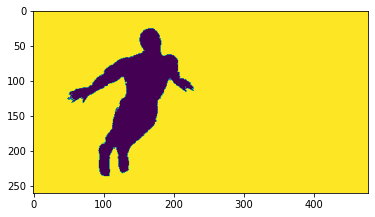

In [77]:
mask = cv2.inRange(image_copy, lower_bound, upper_bound)
## Here the inrange func. looks at each pixel value of the iamge and see's if the it falls under the 
## selected bounds. If, the value is in range, it will allow the image to be displayed, otherwise, it will turn 
## into black
plt.imshow(mask)

Now, we'll only let the image show thorugh

(260, 478, 3)


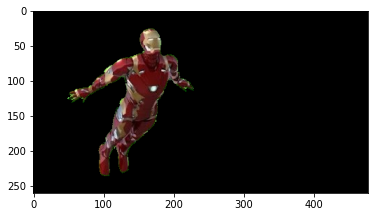

In [78]:
masked_image = np.copy(image_copy)

## This is done because, the mask let's the part to be shown if it is in the range.
## So, we black the pixel values of the part where the mask is not 0. ( the part shown )
masked_image[mask != 0] = [0,0,0]
print(masked_image.shape)
plt.imshow(masked_image)

In [79]:
background_image = cv2.imread('space.jpg')
background_image.shape

(1000, 1500, 3)

(260, 478, 3)


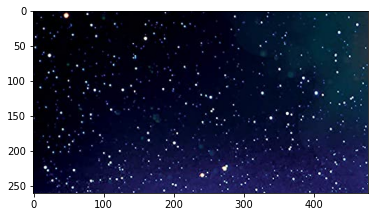

In [80]:
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
background_image = background_image[0:260, 0:478]
print(background_image.shape)
plt.imshow(background_image)

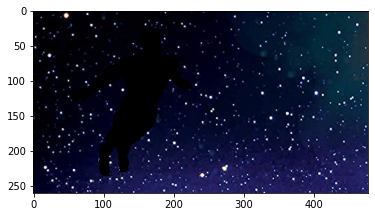

In [81]:
background_image[mask == 0] = [0,0,0]

plt.imshow(background_image)

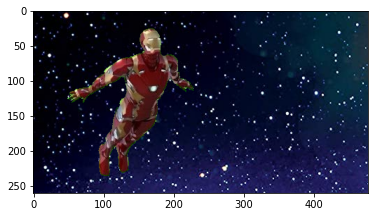

In [82]:
## to plot the complete image , we can just add
complete_image = background_image + masked_image

plt.imshow(complete_image)